In [4]:
import pandas as pd
import os
import math
os.getcwd()

ModuleNotFoundError: No module named 'pandas'

In [1]:
# 読み込み
data = pd.read_csv("Data/data_fixTimestamp.csv")
del data["Unnamed: 0"]
data["date"] = pd.to_datetime(data["date"])

NameError: name 'pd' is not defined

In [ ]:
data.columns

In [ ]:
import matplotlib.pyplot as plt
import uuid
import img2pdf

df = data.set_index("date")
df = data.iloc[:,0:10]  

def splitDF(df):
    """
    データフレームを1ページ分に分割する
    """
    attrs = df.columns

    # indexで分割する
    col_idx = range(len(attrs))
    slice_idx = col_idx[0:len(col_idx):10]
    list_figname_df = [] 

    # 画像ファイル名とデータフレームのセットを作成する
    for idx in slice_idx:
        filename = uuid.uuid1()
        target_idx = col_idx[idx:idx+10]
        target_df = df.iloc[:,target_idx]
        list_figname_df.append([f"{filename}.jpg", target_df])

    return list_figname_df


def mergeImg2PDF(o_path, pathlist):
    with open(o_path,"wb") as f:
        f.write(img2pdf.convert(pathlist))
        f.close()
    
    # jpgファイルを削除する
    for path in pathlist:
        os.remove(path)
    

def writeValueShiftCharts(df, x="date",o_path="ts_chart.pdf"):
    """
    データフレームを受け取り、属性別に折れ線グラフを作成し、pdfファイルを出力する
    グラフ数は1ページに10個
    (前提)折れ線グラフのX軸は、日付時刻型

    入力例：
    writeValueShiftCharts(data, x="date")　x軸の列名を指定する
    writeValueShiftCharts(data)　x軸の列名は、date
    """
    attrs = list(df.columns)
    x = df[x]

    list_figname_df = splitDF(df)

    # グラフの配置とサイズ設定
    row = 10; col = 1
    unit_inch = 25.4
    figsize = (210/unit_inch, 297/unit_inch)# A4サイズ

    # ページ単位の処理
    for figname_df in list_figname_df:
        fig, axs = plt.subplots(row, col, sharex="col", figsize=figsize)
        attrs_sep = figname_df[1].columns
        
        # グラフ単位処理
        for idx, attr in enumerate(attrs_sep):
            axs[idx].plot(x, figname_df[1][attr])
            axs[idx].set_title(attr, loc="left")

        fig.tight_layout()

        plt.savefig(figname_df[0])
    
    # jpgファイルから
    pathlist = [figname_df[0] for figname_df in list_figname_df]
    mergeImg2PDF(o_path, pathlist)

writeValueShiftCharts(data, x="date")

In [ ]:
import batch_graph

df_dropdate = data.drop("date", axis=1)
batch_graph.writeValueHists(df_dropdate)

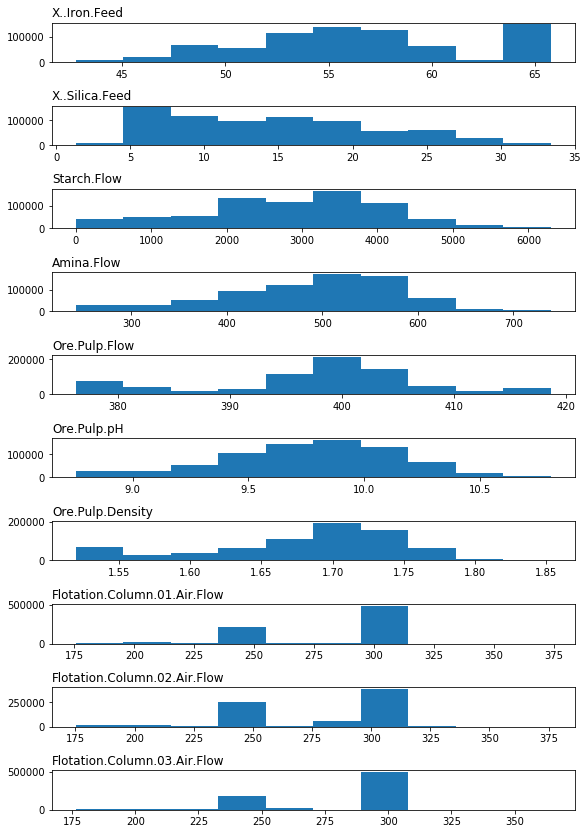

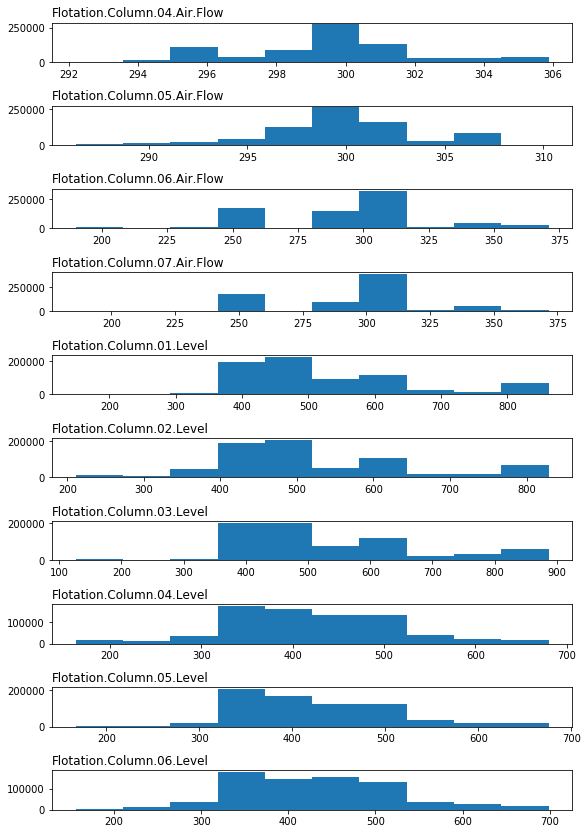

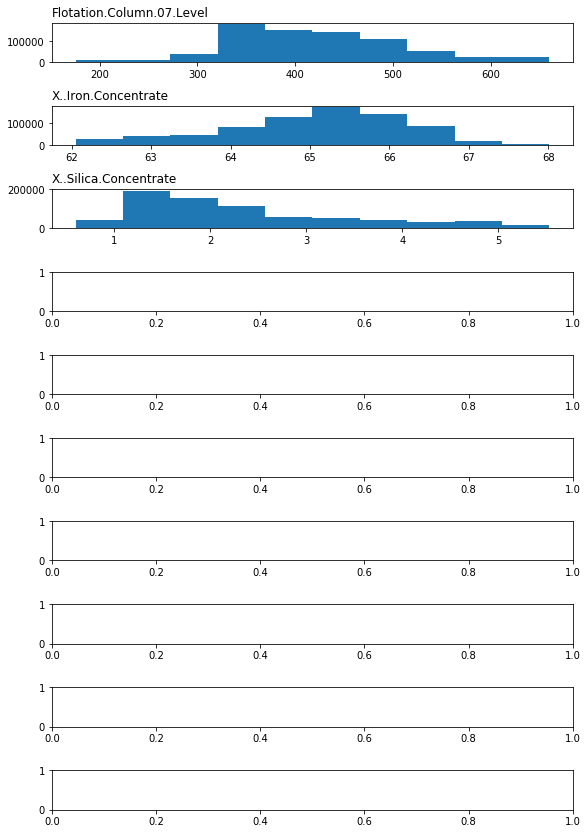

In [132]:
list_figname_df = []
list_figname_df.append(["aaaaaaa.jpg", df_dropdate.iloc[:,0:10]])
list_figname_df.append(["bbbbbbb.jpg", df_dropdate.iloc[:,10:20]])
list_figname_df.append(["ccccccc.jpg", df_dropdate.iloc[:,20:30]])


for figname_df in list_figname_df:
    fig, axs = plt.subplots(row, col, figsize=figsize)
    attrs_sep = figname_df[1].columns
    
    # グラフ単位処理
    for idx, attr in enumerate(attrs_sep):
        axs[idx].hist(figname_df[1][attr])
        axs[idx].set_title(attr, loc="left")
        

    fig.tight_layout()

    plt.savefig(figname_df[0])

In [5]:
import pandas

ModuleNotFoundError: No module named 'pandas'